In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import timeit
from time import sleep
import cv2.aruco as aruco
import math
from IPython.display import display, clear_output
import math, sys, os
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
from plotter import *
from kalman import *
from motion import *
from timer import *
from global_utils import convert_to_np,sort_coords,vis_graph,heuristic,a_star,plot_map,swap_xy
from vision_utils import *

In [2]:
#setup camera
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_EXPOSURE, -4)  #adjust this to avoid reflection from A4 paper

True

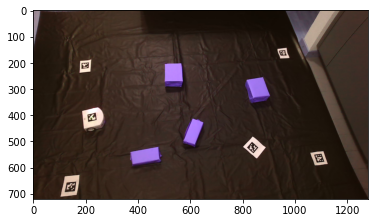

In [3]:
#for faking dynamic camera input
frame_tmp = cv2.imread('test3.png')
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# frame = cv2.imread('test_im_floor.jpeg')
plt.imshow(frame_tmp)

## Dynamic plotting in main loop

In [ ]:
#camera warmup run at start up to get stable frames
ret, frame = cap.read()
time.sleep(1)
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [12]:
#run one time or when replanning
cam_OK, Thymio_center, Thymio_dir, Thymio_target, obs_corners, obstacles_mask, warpedimg, warpedimg_clean = localisation_cam(frame)
[obs_coords, start, goal] = convert_to_np(obs_corners, Thymio_center, Thymio_target)
obs_coords = sort_coords(obs_coords)
[nodes, edges] = vis_graph(obs_coords, start, goal)
h = heuristic(nodes)
optimal_path = a_star(nodes, edges, h)

In [9]:
def vision_update(): #40ms cycle
    global cap, frame, cam_OK,\
           Thymio_center, Thymio_dir, Thymio_target,\
           obs_corners,obstacles_mask, warpedimg_clean_annotated, warpedimg_annotated
#     ret, frame_tmp = cap.read()
#     if ret:
#         frame = cv2.cvtColor(frame_tmp, cv2.COLOR_BGR2RGB)
    frame = cv2.cvtColor(frame_tmp, cv2.COLOR_BGR2RGB)
#     warpedimg = frame
#     warpedimg_clean = frame
#     frame = cv2.cvtColor(frame_tmp, cv2.COLOR_BGR2RGB)
    cam_OK, Thymio_center_tmp, Thymio_dir_tmp, Thymio_target_tmp, obs_corners_tmp, obstacles_mask_tmp, warpedimg_tmp, warpedimg_clean_tmp = localisation_cam(frame)
    if cam_OK:
        Thymio_center, Thymio_dir, Thymio_target, obs_corners, obstacles_mask, warpedimg, warpedimg_clean = Thymio_center_tmp, Thymio_dir_tmp, Thymio_target_tmp, obs_corners_tmp, obstacles_mask_tmp, warpedimg_tmp, warpedimg_clean_tmp
        warpedimg_clean_annotated = overlay_vis_graph(Thymio_center, Thymio_target, obs_corners, optimal_path, warpedimg_clean)
        warpedimg_annotated = overlay_vis_graph(Thymio_center, Thymio_target, obs_corners, optimal_path, warpedimg)

In [13]:
rt1 = RepeatedTimer(0.05, vision_update)

In [14]:
%matplotlib qt
# %matplotlib inline #not working
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
while(1):
    ax1.cla()
    ax1.imshow(warpedimg_clean_annotated)
    ax2.cla()
    ax2.imshow(warpedimg_annotated)
    plt.pause(0.001)
    clear_output(wait=True)

KeyboardInterrupt: 

In [15]:
rt1.stop()